## Лабораторная работа

Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

#### Цель лабораторной работы: изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

#### Требования к отчету:

Отчет по лабораторной работе должен содержать:

1. титульный лист;
2. описание задания;
3. текст программы;
4. экранные формы с примерами выполнения программы.

### Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.
5. Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
8. Постройте кривые обучения и валидации.

(dataset)
Опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('iris_.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Проведём кодирование категориального признака

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = le.fit_transform(df['Species'])

In [6]:
df1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df['Species'] = pd.Series(df1)

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
X = df.drop(["Species"], axis=1) 
y = df["Species"]

#### Разобьем датасет на тренировочный и обучающий

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42 )

#### Построим модель классификации ближайших соседей без применения кросс-валидации

In [58]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

#### Оценим качество модели с помощью трех подходящих для задачи метрик

In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.9910714285714286
1.0


In [60]:
from sklearn.metrics import recall_score
print(recall_score(y_train, clf.predict(X_train), average='weighted'))
print(recall_score(y_test, clf.predict(X_test), average='weighted'))

0.9910714285714286
1.0


In [61]:
from sklearn.metrics import precision_score
print(precision_score(y_train, clf.predict(X_train), average='weighted'))
print(precision_score(y_test, clf.predict(X_test), average='weighted'))

0.9912946428571429
1.0


#### Применим кросс-валидационные способы

In [71]:
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit, StratifiedKFold

print('KFold')
kf = KFold(n_splits=5, shuffle=True, random_state=1)
%time scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=kf, scoring='accuracy')
print('Accuracy train: %0.2f (± %0.2f)' % (scores.mean(), scores.std() * 2))

print('\nShuffleSplit')
sh = ShuffleSplit(random_state=1)
%time scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=sh, scoring='accuracy')
print('Accuracy train: %0.2f (± %0.2f)' % (scores.mean(), scores.std() * 2))

print('\nStratifiedKFold')
sfkf = StratifiedKFold(random_state=1)
%time scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=sfkf, scoring='accuracy')
print('Accuracy train: %0.2f (± %0.2f)' % (scores.mean(), scores.std() * 2))

KFold
CPU times: user 30.8 ms, sys: 2.23 ms, total: 33 ms
Wall time: 32.4 ms
Accuracy train: 0.97 (± 0.10)

ShuffleSplit
CPU times: user 48.5 ms, sys: 700 µs, total: 49.2 ms
Wall time: 48.9 ms
Accuracy train: 0.97 (± 0.11)

StratifiedKFold
CPU times: user 19 ms, sys: 678 µs, total: 19.7 ms
Wall time: 19.3 ms
Accuracy train: 0.97 (± 0.04)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


#### Произведём подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [74]:
from sklearn.model_selection import GridSearchCV

In [100]:
parametrs = {'n_neighbors': range(1,30)}
search = GridSearchCV(KNeighborsClassifier(), parametrs, cv=5, scoring='accuracy')
search.fit(X_train, y_train)
search.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 1}

In [101]:
gr_clf = search.best_estimator_

In [102]:
gr_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [105]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, gr_clf.predict(X_train)))
print(accuracy_score(y_test, gr_clf.predict(X_test)))
print('\n')
from sklearn.metrics import recall_score
print(recall_score(y_train, gr_clf.predict(X_train), average='weighted'))
print(recall_score(y_test, gr_clf.predict(X_test), average='weighted'))
print('\n')
from sklearn.metrics import precision_score
print(precision_score(y_train, gr_clf.predict(X_train), average='weighted'))
print(precision_score(y_test, gr_clf.predict(X_test), average='weighted'))

1.0
1.0


1.0
1.0


1.0
1.0


##### Мы видим , качество тренировочной выборки стало 1, а тестовая и так была 1.

## Построем кривые обучения и валидации

### Построение кривой обучения

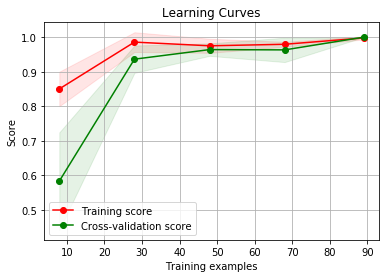

In [121]:
from sklearn.model_selection import learning_curve, validation_curve
train_sizes=np.linspace(.1, 1.0, 5)

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(), X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score");
plt.legend(loc="best");

### Построим кривую валидации

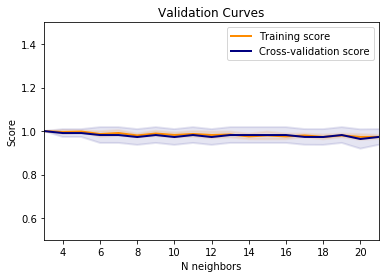

In [125]:
param_range = range(1,30)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=-1,
    cv=KFold(n_splits=5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curves")
plt.xlabel("N neighbors")
plt.ylabel("Score")
plt.xlim(3.0, 21.0)
plt.ylim(0.5, 1.5)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best");